## I made this Notebook just for learning Purpose and i have taken Idea from multiple sources, take what you want and if have any suggestion kindly put it down in comments. 
This is my beginner code and I am happy to say that i have come a long way and looking forward to keep going. 
This was something which gave me the boost to keep working.

I hope it helps you the same!
Thanks :)

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import spacy
import time
from spacy.matcher import Matcher
from spacy.matcher import PhraseMatcher
from wordcloud import WordCloud
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_colwidth',1000)


train_set_orig= pd.read_csv('../input/nlp-getting-started/train.csv')
test_set_orig = pd.read_csv('../input/nlp-getting-started/test.csv')

In [ ]:
print(f'Training Data has {train_set_orig.shape[0]} rows and {train_set_orig.shape[1]} columns')
print(f'Testing Data has {test_set_orig.shape[0]} rows and {train_set_orig.shape[1]} columns')

In [ ]:
test_set_orig.describe()

In [ ]:
train_set_orig.columns

In [ ]:
#number of positive and Negative tweets
PN=train_set_orig['target'].value_counts()
PN.plot(kind='bar',color=['red','green'])
plt.xticks([0,1],['Negative','Real tweets'])
print(f'Training set has {PN[1]} Negative tweets and {PN[0]} Positive tweets')

In [ ]:
#Comparing length of real tweet and non real tweetss
plt.style.use('fivethirtyeight')
train_group=train_set_orig.groupby('target')
real_text_length= [len(text) for text in train_group.get_group(0)['text']]
neg_text_length= [len(text) for text in train_group.get_group(1)['text']]
bins=150
plt.figure(figsize=(20,5))
plt.hist(real_text_length,bins= bins,label='Positive',color='green',alpha= 0.7)
plt.hist(neg_text_length,bins=bins,label='Negative',color='red',alpha=0.6)
plt.xlabel('length of tweets')
plt.ylabel('Number of tweets')
plt.legend()


In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
plt.title('Number of characters in real and Not Real tweets')
ax1.hist(real_text_length,color= 'green')
ax1.set_xlabel('Number of real tweets',color= 'green')
ax1.set_ylim([0,1000])
ax2.hist(neg_text_length,color='red')
ax2.set_xlabel('Number of not real tweets',color='red')
ax2.set_ylim([0,1000])

It can be clearly scene that tweets size between 120 to 400 length are same in both type of tweets.
But are the words length same too ??

In [ ]:
def avg(x):
    return np.sum([len(word) for word in x])

neg_tweet_avg= [np.sum(list(map(avg,text)))/len(text.split()) for text in train_group.get_group(1)['text']]
post_tweet_avg= [np.sum(list(map(avg,text)))/len(text.split()) for text in train_group.get_group(0)['text']]

In [ ]:
fig,(ax1,ax2)= plt.subplots(1,2,figsize=(15,5))
sns.distplot(neg_tweet_avg,color='red',ax=ax1)
ax1.set_title('negative tweets')
ax1.set_xlabel('average tweet length')
sns.distplot(post_tweet_avg,color='green',ax=ax2)
ax2.set_title('positive tweets')
ax2.set_xlabel('average tweet length')


In [ ]:
nlp= spacy.load('en_core_web_lg')
stopwords= nlp.Defaults.stop_words

In [ ]:
# import time
# tic=time.time()
# corpus=[nlp(text) for text in train_group.get_group(1)['text']]
# toc= time.time()
# print(f'time taken by using list comprehension:{(toc-tic)*1000}ms')

## time taken by using list comprehension:41624.28307533264ms


In [ ]:
tic= time.time()
pos_text= train_group.get_group(0)['text'].to_string().replace('\n',' ')
neg_text= train_group.get_group(1)['text'].to_string().replace('\n',' ')

pos_corpus=nlp(pos_text)
neg_corpus=nlp(neg_text)

toc=time.time()

print(f'string conversion takes:{(toc-tic)*100}ms')
##string conversion takes:1640.8559560775757ms

matcher= PhraseMatcher(nlp.vocab)
pattern= [nlp(word) for word in stopwords]
matcher.add('stopwords',None,*pattern)

pos_matches= matcher(pos_corpus)
neg_matches= matcher(neg_corpus)

pos_words_found= [str(pos_corpus[pos_matches[i][1]:pos_matches[i][2]]) for i in range( len(pos_matches))]
neg_words_found= [str(neg_corpus[neg_matches[i][1]:neg_matches[i][2]]) for i in range( len(neg_matches))]


In [ ]:
plt.figure(figsize=(15,5))
pd.Series(pos_words_found).value_counts()[:40].plot(kind='bar',color='green',label='Repetitive words in postitive tweet')
pd.Series(neg_words_found).value_counts()[:40].plot(kind='bar',color='red',label='Repetitive words in negative tweet')

plt.legend()


In Both positive and Negative tweet **['The' , 'a' , 'to' , 'of' , 'you']** dominates

In [ ]:
pos_special_char= train_group.get_group(1)['text'].str.findall('[^A-Za-z0-9\s]')
neg_special_char= train_group.get_group(0)['text'].str.findall('[^A-Za-z0-9\s]')

In [ ]:
fig= plt.figure(figsize=(15,5))

all_neg_char=[ch for char in neg_special_char for ch in char]
pd.Series(all_neg_char).value_counts()[:30].plot(kind='bar',label='characters used in negative tweets',color='red')

all_pos_char=[ch for char in pos_special_char for ch in char]
pd.Series(all_pos_char).value_counts()[:30].plot(kind='bar',label='characters used in positive tweets',color='green',alpha=0.5)

plt.legend()


In [ ]:
#Plotting more clearly using a DataFrame
n=pd.Series(all_neg_char).value_counts()
p= pd.Series(all_pos_char).value_counts()
df=pd.DataFrame({'positive':p,'negative':n}).sort_values('positive',ascending=False)[:20]
df.plot(kind='bar',figsize=(15,5),color=['green','red'])

## it will be interesting to see these figures after removing stop words

In [ ]:
a=pd.Series(pos_words_found).value_counts()
b=pd.Series(neg_words_found).value_counts()
df= pd.DataFrame({'common_positive_words':a,'common_negative_words':b}).sort_values('common_positive_words',ascending=False)
df[:40].plot(kind='bar',figsize=(15,5),color=['green','red'])


## most common #HashTags in negative tweets

In [ ]:
import re
matcher= Matcher(nlp.vocab)
pattern= [{'TEXT':{'REGEX':'#'}},{'TEXT':{'REGEX':'\w+'}}]
matcher.add('p1',None,pattern)

doc= pos_corpus
matches= matcher(doc)
hash_tags=[]
aa=[hash_tags.append(re.sub(r'_|\\n','',str(doc[matches[i][1]:matches[i][2]]))) for i in range(len(matches))]
plt.figure(figsize=(12,8))
word_cloud = WordCloud(
                          background_color='black',
                          max_font_size = 80
                         ).generate(' '.join(hash_tags))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

## most common #HashTags in negative tweets

In [ ]:
doc= neg_corpus
matches= matcher(doc)
hash_tags=[]
aa=[hash_tags.append(re.sub(r'_|\\n','',str(doc[matches[i][1]:matches[i][2]]))) for i in range(len(matches))]
plt.figure(figsize=(12,8))
word_cloud = WordCloud(
                          background_color='red',
                          max_font_size = 80
                         ).generate(' '.join(hash_tags))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

## Data Cleaning


In [ ]:
from collections import defaultdict

train= train_set_orig.copy()
test= test_set_orig.copy()

In [ ]:
pd.DataFrame({'train':train.isna().sum()/len(train)*100,'test':test.isna().sum()/len(test)*100}).plot(kind='bar')

## Location column are user generated so being that much dirty and lots of empty values, it can't be used as a feature

In [ ]:
train['keyword'].value_counts()[:50]

## Some values in keyword section can only be written in one context

In [ ]:
train.head()

In [ ]:
d= defaultdict(int)

unique_keywords= train['keyword'].dropna().unique()

key_group= train[['keyword','target']].groupby('keyword')
for word in unique_keywords:
    d[word]= [v for v in key_group.get_group(word)['target'].value_counts().values]


In [ ]:
for word in unique_keywords:
    z= key_group.get_group(word)['target'].value_counts()
    print(f'{word} keyword has {z[0]} postive tweets and {z[1]} negative tweets')
    break

In [ ]:
df=pd.DataFrame(d.items())
df2= pd.DataFrame(df[1].to_list(),columns=['positive','negative'])
df2.index= df[0]

df2=df2.sort_values(by='positive',ascending=False)

In [ ]:
import matplotlib.pyplot as plt

df2=df2.sort_values(by='positive',ascending=False)
fig,ax= plt.subplots()
ax.scatter(x='positive',y='negative',data= df2,alpha=0.4)

# ax.scatter(x='positive',y='negative',data= pos,color='green')
# ax.scatter(x='positive',y='negative',data= neg,color='red')

pos_keyword=pd.DataFrame([df2.iloc[i] for i in range(len(df2)) if df2['negative'][i]<5.0 and df2['positive'][i]>25])
ax.scatter(x='positive',y='negative',data= pos_keyword,color='green')


neg_keyword= pd.DataFrame([df2.iloc[i] for i in range(len(df2)) if df2['positive'][i]<25.0 and df2['negative'][i]>15.0])
ax.scatter(x='positive',y='negative',data= neg_keyword,color='red')

# # ax.annotate('ablaze',(23,13))

plt.xlabel('positive')
plt.ylabel('negative')

 ## List of keyword which are highly positive
> pos_keyword.index
1. > ['body%20bags', 'outbreak', 'typhoon', 'oil%20spill', 'harm', 'ruin',
       'wrecked', 'explode', 'panic', 'screaming', 'traumatised', 'blazing',
       'blizzard', 'crush', 'evacuated', 'rescuers', 'suicide%20bomb',
       'bloody', 'body%20bag', 'suicide%20bombing', 'panicking', 'smoke',
       'nuclear%20disaster', 'collide', 'razed', 'electrocute', 'blew%20up',
       'blight', 'suicide%20bomber', 'stretcher', 'screamed', 'drown',
       'wildfire', 'wild%20fires', 'obliterate', 'crushed', 'mayhem',
       'bombing', 'obliterated', 'avalanche'],
      
 ## List of keyword which are highly Negative
> neg_keyword.index
 2. >['windstorm', 'collided', 'weapons', 'damage', 'burning%20buildings',
       'police', 'hurricane', 'ambulance', 'explosion', 'bombed', 'hijacker',
       'tornado', 'engulfed', 'hail', 'derail', 'rainstorm',
       'natural%20disaster', 'rescued', 'storm', 'hijack', 'lightning']

## Data Cleaning

## As the name suggest we are removing URL's

In [ ]:
import re

example="New competition launched :https://www.kaggle.com/c/nlp-getting-started"
def clean_url(text):
    return re.sub(r':?http[s]?:\S+','',text)
clean_url(example)

In [ ]:
train['text']= train['text'].apply(lambda x: clean_url(x))
test['text']= test['text'].apply(lambda x:clean_url(x))


## Clean Text if their is any Html tags out in our text

In [ ]:
example = """<div>
<h1>Real or Fake</h1>
<p>Kaggle </p>
<a href="https://www.kaggle.com/c/nlp-getting-started">getting started</a>
</div>"""

def clean_tag(text):
    return re.sub(r'<.*?>','',text)
print(clean_tag(example))

In [ ]:
train['text']= train['text'].apply(lambda x:clean_tag(x))
test['text']= test['text'].apply(lambda x:clean_tag(x))


In [ ]:
train.head(200)

## Remove Symbols, and make every text in lower format but keep @ and # because they signify the @User and #Topic

In [ ]:
def non_alpha(text):
    return re.sub('[^A-Za-z0-9\'@#]+',' ',text).lower()
print(non_alpha("ÛÏ@LeoBlakeCarter: This #dog thinks he's an am."))

In [ ]:
train['text']= train['text'].apply(lambda x: non_alpha(x))
test['text']= test['text'].apply(lambda x:non_alpha(x))


In [ ]:
train.head(400)

## Removing @User name

In [ ]:
example='@Mohit1 @ Mohit2 @m @moo mohit5t01c @mohit5t01c hello Mohit @phdsquares'
def remove_user(text):
    text= re.sub(r'(@[A-Za-z0-9]?[A-Za-z0-9]*)| \s[A-Za-z0-9]+\s','',text).split()
    print(text)
    text=[word for word in text if word.isalpha() == True and len(word)>2]
    print(text)
    text= ' '.join(text)
    return text
remove_user(example)

In [ ]:
train['text']= train['text'].apply(lambda x:remove_user(x))
test['text']= test['text'].apply(lambda x:remove_user(x))


In [ ]:
def create_corpus(df,target):
    group= df.groupby('target').get_group(target)
    corpus=[]
    nn=[corpus.append(word) for text in group['text'] for word in text.split()]
    return corpus



In [ ]:
train_corpus= create_corpus(train,1)
plt.figure(figsize=(12,8))
wc= WordCloud().generate(' '.join(train_corpus))
plt.imshow(wc)
plt.title("Common words in Disaster's tweet")
plt.show()

In [ ]:
train_corpus= create_corpus(train,0)
plt.figure(figsize=(12,8))
wc= WordCloud().generate(' '.join(train_corpus))
plt.imshow(wc)
plt.title("Common words in Fake Disaster's tweet")
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
train=train.drop(['keyword','id','location'],axis=1)
test= test.drop(['keyword','location'],axis=1)

In [ ]:
import nltk
from nltk.corpus import stopwords
from spacy.lang.en.stop_words import STOP_WORDS #-- set
s1= stopwords.words('english') #-- list
print(len(STOP_WORDS))

aa=[STOP_WORDS.add(word) for word in s1 if word not in STOP_WORDS]
print(len(STOP_WORDS))


In [ ]:
cv= CountVectorizer(stop_words=STOP_WORDS)
train= pd.DataFrame(cv.fit_transform(train['text']).todense())
test= pd.DataFrame(cv.transform(test['text']).todense())

In [ ]:
X= train
y= train_set_orig['target']

In [ ]:
print(train.shape)
print(test.shape)

In [ ]:
print(X.shape)
print(y.shape)

In [ ]:
from sklearn.model_selection import train_test_split
train_x,val_x,test_y,val_y = train_test_split(X,y)
print(train_x.shape)
print(val_x.shape)
print(test_y.shape)
print(val_y.shape)

In [ ]:
print(len(val_x))
len(val_y)

In [ ]:
import numpy as np

def initialize_parameters(X):
    w= np.zeros(X.shape[1])
    b=0
    return w,b
def sigmoid(z):
    return 1/(1+np.exp(-z))

    
def propogate(w,b,X,y):
    m= len(X)
    z= X.dot(w.T)
    A= sigmoid(z)
    cost=- 1/m * np.sum(y * np.log(A) + (1-y)* np.log(1-A))
    dz= A-y
    dw= np.dot(dz.T , X) * (1/m)
    db= sum(A-y) * (1/m)
    
    grads={'dw':dw,'db':db}
    return cost,grads

def gradient_descent(w,b,X,y,grads,alpha,num_iteration):
    
    for i in range(num_iteration):     
        
        dw= grads['dw']
        db= grads['db']
        
        w= w- alpha * dw
        b= b- alpha * db
        
        cost,grads= propogate(w,b,X,y)
        if i%100 ==0:
            print(f'iterations:{i} --> cost {cost *100}')
            
    return cost,grads

X1=train_x
Y1=test_y

w,b=initialize_parameters(X1)
cost,grads= propogate(w,b,X1,Y1)
best_cost,best_grads= gradient_descent(w,b,X1,Y1,grads,0.9,1000)

# print('w',w.shape)
# print('X',X1.shape)
# print('y',Y1.shape)

In [ ]:
dw1= best_grads['dw']
def predict(X,w):
    y_pred= sigmoid(X.dot(w.T))<0.5
    return y_pred.map({True: 1,False: 0})
y_pred= predict(val_x,dw1)
mean_absolute_error(y_pred,val_y)

In [ ]:
#1 real disaster == less than 0.5
#0 unreal disaster 
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_pred,val_y)

In [ ]:
answer= predict(test,dw1)
output= pd.DataFrame({'id':test_set_orig['id'],'target':answer})
output.to_csv('submission_correct.csv',index=False)

##  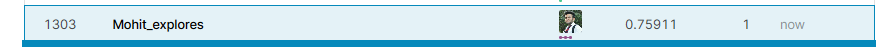